In [ ]:
!pip install tensorflow-text
import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow_hub as hub
import tensorflow_text as text
nltk.download("popular")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
msg = pd.read_csv('train.csv')

In [ ]:
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]
df_test0=df_test0.iloc[0:250,]
df_test1=df_test1.iloc[0:250,]
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)
test=pd.concat([df_test0,df_test1])
msg.reset_index(drop=True,inplace=True)

In [ ]:
lemmatizer= WordNetLemmatizer()
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [ ]:
test.reset_index(drop=True,inplace=True)

In [ ]:
test.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
texttransform=sbert_model.encode(corpus1)
testtransform=sbert_model.encode(corpus2)

In [ ]:
mpnet = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(texttransform, msg['label'])

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(texttransform, msg['label'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Bidirectional,Dropout
from keras.layers import CuDNNLSTM

In [ ]:
X.shape


(58940, 768)

In [ ]:
 xt=X.reshape(58940,1,768)

In [ ]:
model=Sequential()
model.add(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,768)))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 100, epochs = 10)

Epoch 1/10
590/590 [==============================] - 4s 4ms/step - loss: 0.4231 - accuracy: 0.8618
Epoch 2/10
590/590 [==============================] - 4s 7ms/step - loss: 0.2464 - accuracy: 0.9034
Epoch 3/10
590/590 [==============================] - 4s 8ms/step - loss: 0.2151 - accuracy: 0.9153
Epoch 4/10
590/590 [==============================] - 4s 7ms/step - loss: 0.1903 - accuracy: 0.9274
Epoch 5/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1694 - accuracy: 0.9357
Epoch 6/10
590/590 [==============================] - 3s 4ms/step - loss: 0.1535 - accuracy: 0.9427
Epoch 7/10
590/590 [==============================] - 3s 4ms/step - loss: 0.1417 - accuracy: 0.9481
Epoch 8/10
590/590 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9535
Epoch 9/10
590/590 [==============================] - 3s 4ms/step - loss: 0.1211 - accuracy: 0.9576
Epoch 10/10
590/590 [==============================] - 3s 4ms/step - loss: 0.1125 - accuracy: 0.9614

In [ ]:
y_pred = model.predict(testtransform.reshape(500,1,768))
y_pred = (y_pred > 0.5)

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))


              precision    recall  f1-score   support

           0       0.78      0.96      0.86       250
           1       0.95      0.73      0.83       250

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.84       500
weighted avg       0.86      0.85      0.84       500



Text(0.5, 15.0, 'Predicted label')

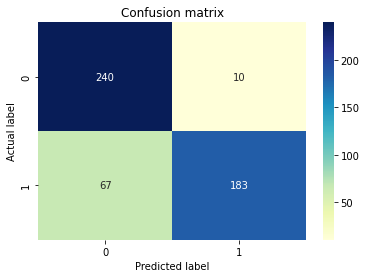

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:

model2=Sequential()
model2.add(Bidirectional(CuDNNLSTM(units =6, kernel_initializer = 'uniform', input_shape = (1,768))))
# Adding the second hidden layer
model2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model2.fit(xt, y, batch_size = 100, epochs = 10)

y_pred2 = model2.predict(testtransform.reshape(500,1, 768))
y_pred2 = (y_pred2 > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred2))

Epoch 1/10
590/590 [==============================] - 8s 9ms/step - loss: 0.3885 - accuracy: 0.8678
Epoch 2/10
590/590 [==============================] - 4s 7ms/step - loss: 0.2318 - accuracy: 0.9086
Epoch 3/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1899 - accuracy: 0.9273
Epoch 4/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1613 - accuracy: 0.9411
Epoch 5/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1417 - accuracy: 0.9498
Epoch 6/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1261 - accuracy: 0.9572
Epoch 7/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1129 - accuracy: 0.9621
Epoch 8/10
590/590 [==============================] - 3s 5ms/step - loss: 0.1023 - accuracy: 0.9662
Epoch 9/10
590/590 [==============================] - 3s 5ms/step - loss: 0.0896 - accuracy: 0.9704
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              precision    recall  

In [ ]:
X_oversample_ada.shape

(58627, 768)

Epoch 1/10
587/587 [==============================] - 4s 4ms/step - loss: 0.4500 - accuracy: 0.8454
Epoch 2/10
587/587 [==============================] - 4s 6ms/step - loss: 0.2751 - accuracy: 0.8922
Epoch 3/10
587/587 [==============================] - 4s 7ms/step - loss: 0.2283 - accuracy: 0.9113
Epoch 4/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1952 - accuracy: 0.9276
Epoch 5/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1708 - accuracy: 0.9382
Epoch 6/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1507 - accuracy: 0.9475
Epoch 7/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1347 - accuracy: 0.9539
Epoch 8/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1221 - accuracy: 0.9586
Epoch 9/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1142 - accuracy: 0.9622
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

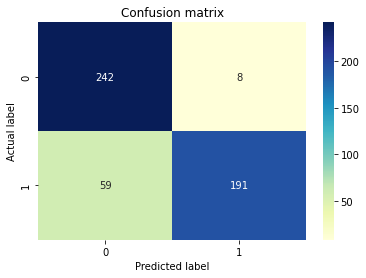

In [ ]:
#using adasyn
xt=X_oversample_ada.reshape(58627,1,768)
model=Sequential()
model.add(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,768)))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y_oversample_ada, batch_size = 100, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,768))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Epoch 1/10
587/587 [==============================] - 6s 5ms/step - loss: 0.4022 - accuracy: 0.8498
Epoch 2/10
587/587 [==============================] - 3s 5ms/step - loss: 0.2535 - accuracy: 0.9019
Epoch 3/10
587/587 [==============================] - 3s 5ms/step - loss: 0.1974 - accuracy: 0.9273
Epoch 4/10
587/587 [==============================] - 3s 5ms/step - loss: 0.1581 - accuracy: 0.9453
Epoch 5/10
587/587 [==============================] - 3s 5ms/step - loss: 0.1297 - accuracy: 0.9576
Epoch 6/10
587/587 [==============================] - 3s 5ms/step - loss: 0.1090 - accuracy: 0.9659
Epoch 7/10
587/587 [==============================] - 3s 5ms/step - loss: 0.0952 - accuracy: 0.9707
Epoch 8/10
587/587 [==============================] - 3s 5ms/step - loss: 0.0829 - accuracy: 0.9752
Epoch 9/10
587/587 [==============================] - 3s 5ms/step - loss: 0.0739 - accuracy: 0.9793
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

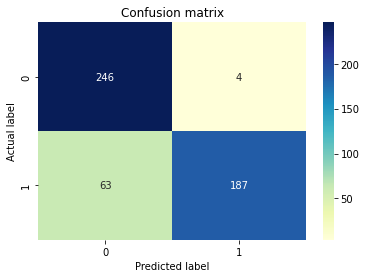

In [ ]:
#using adasyn
X_oversample_ada.shape
xt=X_oversample_ada.reshape(58627,1,768)
model=Sequential()
model.add(Bidirectional(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,768))))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y_oversample_ada, batch_size = 100, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,768))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')